In [1]:
import matplotlib.pyplot as plt
import pandas as pd

from plmprobe.dataset import data_io
from plmprobe.dataset.cath_dataset import get_cath_db

#### Load CATH IDs in CATH S20 with PDB contacts; 64< and <512 res

In [30]:
db = get_cath_db()

cath_ids = data_io.read_from_txt("data/cath_ids_with_pdb_contacts.txt)
df = pd.DataFrame(cath_ids, columns=["cath_id"])
hydrated_df = data_io.hydrate_df_with_cath_terms(df, db)

In [31]:
hydrated_df 

cath_id chain_id  length  cath_class  cath_architecture  cath_topology  \
0     1e2tA01        A      71           6                 10            140   
1     3qt2A02        A     113           2                 60             40   
2     4p2cA01        A     170           3                 40            420   
3     4dloB01        B      66           4                 10           1240   
4     2ffjA02        A      65           1                 10            285   
...       ...      ...     ...         ...                ...            ...   
8881  5ocrA00        A     278           2                 60            120   
8882  2bidA00        A     197           1                 10            437   
8883  4o6yB00        B     211           1                 20            120   
8884  4cu9A00        A     173           2                 60            120   
8885  2rn7A01        A      66           1                 10             10   

      cath_homologous_superfamily  seq_len  cath_domain_num cath_class_code  \
0                            1930       71                1               6   
1                              10      113                2               2   
2                              10      170                1               3   
3                              10       66                1               4   
4                              20       65                2               1   
...                           ...      ...              ...             ...   
8881                          200      278                0               2   
8882                           10      197                0               1   
8883                         1770      211                0               1   
8884                          260      173                0               2   
8885                           10       66                1               1   

     cath_architecture_code cath_topology_code  \
0                      6.10           6.10.140   
1                      2.60            2.60.40   
2                      3.40           3.40.420   
3                      4.10          4.10.1240   
4                      1.10           1.10.285   
...                     ...                ...   
8881                   2.60           2.60.120   
8882                   1.10           1.10.437   
8883                   1.20           1.20.120   
8884                   2.60           2.60.120   
8885                   1.10            1.10.10   

     cath_homologous_superfamily_code cath_domain_code        cath_code  
0                       6.10.140.1930  6.10.140.1930.1  6.10.140.1930.1  
1                          2.60.40.10     2.60.40.10.2     2.60.40.10.2  
2                         3.40.420.10    3.40.420.10.1    3.40.420.10.1  
3                        4.10.1240.10   4.10.1240.10.1   4.10.1240.10.1  
4                         1.10.285.20    1.10.285.20.2    1.10.285.20.2  
...                               ...              ...              ...  
8881                     2.60.120.200   2.60.120.200.0   2.60.120.200.0  
8882                      1.10.437.10    1.10.437.10.0    1.10.437.10.0  
8883                    1.20.120.1770  1.20.120.1770.0  1.20.120.1770.0  
8884                     2.60.120.260   2.60.120.260.0   2.60.120.260.0  
8885                       1.10.10.10     1.10.10.10.1     1.10.10.10.1  

[8886 rows x 15 columns]

#### Plot structural annotation frequencies in CATH

In [32]:
CATH_CLASSES = {
    1: 'Mainly Alpha',
    2: 'Mainly Beta', 
    3: 'Alpha Beta',
    4: 'Few SS',
    6: 'Special'
}

columns_to_plot = ["cath_class_code", "cath_architecture_code", "cath_topology_code", "cath_homologous_superfamily_code"]
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(30, 8), dpi=600)

for ax, col in zip(axes, columns_to_plot):
    
    top_values = hydrated_df[col].value_counts().head(20)  # Select top 15 categories
    # print()
    top_values.plot(kind="bar", ax=ax)
    ax.set_title(f"{col.split('_')[1].capitalize() if col != 'cath_homologous_superfamily_code' else 'Homologous Superfamily'}", fontsize=20)
    ax.set_xlabel("Top 20 targets", fontsize=20)
    ax.set_ylabel("Count", fontsize=20)
    if col == "cath_class_code":
        ax.set_xticklabels([f"{i}: {CATH_CLASSES[int(i)]}" for i in top_values.keys()], fontsize=20, rotation=45)  # Remove x-axis tick labels
    ax.tick_params(axis='x', labelsize=18)
    ax.tick_params(axis='y', labelsize=20)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
    
plt.tight_layout()
plt.show()

#### Plot sequence length distributions by CATH level

In [33]:
# Get unique CATH classes
unique_classes = sorted(hydrated_df["cath_class"].unique())
num_classes = len(unique_classes)

fig, axes = plt.subplots(nrows=1, ncols=num_classes, figsize=(5 * num_classes, 6), dpi=600)

if num_classes == 1:
    axes = [axes]

for ax, cath_class in zip(axes, unique_classes):
    subset = hydrated_df[hydrated_df["cath_class"] == cath_class]
    ax.hist(subset["seq_len"], bins=30, alpha=0.7, edgecolor="black")
    
    ax.set_title(f"CATH Class: {CATH_CLASSES[cath_class]}", fontsize=20)
    ax.set_xlabel("Sequence Length", fontsize=20)
    ax.set_ylabel("Frequency", fontsize=20)
    
    ax.tick_params(axis='x', labelsize=15, rotation=45)
    ax.tick_params(axis='y', labelsize=15)
    ax.set_ylim(0, 400)
    
plt.tight_layout()
plt.show()

In [34]:
hydrated_df["cath_class"].value_counts().sort_values(ascending=False)

cath_class
3    4509
1    2169
2    2038
6     100
4      70
Name: count, dtype: int64

#### Secondary structure residue annotations

In [35]:
dssp_df = data_io.hydrate_df_with_dssp(hydrated_df, db)

In [36]:
dssp_df.head()

cath_id chain_id  length  cath_class  cath_architecture  cath_topology  \
0  1e2tA01        A      71           6                 10            140   
1  3qt2A02        A     113           2                 60             40   
2  4p2cA01        A     170           3                 40            420   
3  4dloB01        B      66           4                 10           1240   
4  2ffjA02        A      65           1                 10            285   

   cath_homologous_superfamily  seq_len  cath_domain_num cath_class_code  \
0                         1930       71                1               6   
1                           10      113                2               2   
2                           10      170                1               3   
3                           10       66                1               4   
4                           20       65                2               1   

  cath_architecture_code cath_topology_code cath_homologous_superfamily_code  \
0                   6.10           6.10.140                    6.10.140.1930   
1                   2.60            2.60.40                       2.60.40.10   
2                   3.40           3.40.420                      3.40.420.10   
3                   4.10          4.10.1240                     4.10.1240.10   
4                   1.10           1.10.285                      1.10.285.20   

  cath_domain_code        cath_code  \
0  6.10.140.1930.1  6.10.140.1930.1   
1     2.60.40.10.2     2.60.40.10.2   
2    3.40.420.10.1    3.40.420.10.1   
3   4.10.1240.10.1   4.10.1240.10.1   
4    1.10.285.20.2    1.10.285.20.2   

                                                dssp  helix_pct  strand_pct  \
0  LLLHHHHHHHHHTTLLLLLSLLHHHHHHHHHHHHHLLLSTTHHIII...  61.971831    0.000000   
1  LGGGSLEEEEEEEEEEELSLSSSLLEEEEEEEEEELLTTLLTTLEE...   5.309735   50.442478   
2  LEEEELTTSHHHHHHHHHHHHHHHEEEEEEEESSSLEEEEELLLLS...  31.176471   23.529412   
3  LTTTSLLLLGGGEELLBLGGGSLBLLEETTLEEEEELLTTLLSEEE...   9.090909   34.848485   
4  LTTHHHHHHHHHHHHHHHHHHHHHHHHSSSHHHHHHHHHHHGGGLL...  81.538462    0.000000   

    coil_pct  
0  38.028169  
1  44.247788  
2  45.294118  
3  56.060606  
4  18.461538

In [37]:
dssp_df["strand_pct"].mean()

21.97568950914123

### Plot 3-way seconday structure annotations by CATH Class

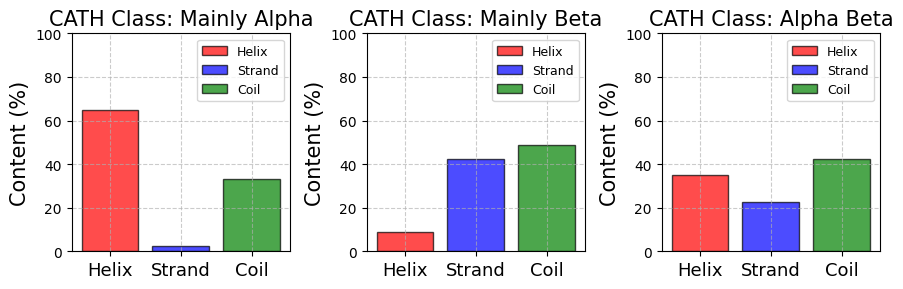

In [40]:
unique_classes = ["1", "2", "3"]  # dssp_df['cath_class_code'].unique()
num_classes = len(unique_classes)

fig, axes = plt.subplots(1, num_classes, figsize=(3 * num_classes, 3), dpi=100)

if num_classes == 1:
    axes = [axes]  

for ax, cath_class in zip(axes, unique_classes):
    subset = dssp_df[dssp_df['cath_class_code'] == cath_class]
    
    means = subset[['helix_pct', 'strand_pct', 'coil_pct']].mean()

    bars = ax.bar(means.index, means.values, color=['red', 'blue', 'green'], alpha=0.7, edgecolor='black', linewidth=1)

    ax.set_title(f'CATH Class: {CATH_CLASSES[int(cath_class)]}',fontsize=15)
    ax.set_ylim(0, 100)  # Assuming percentages
    ax.set_ylabel("Content (%)", fontsize=15)

    ax.set_xticks(range(len(means.index)))
    ax.set_xticklabels(["Helix", "Strand", "Coil"], fontsize=13)
    ax.set_ylim(0, 100)

    ax.legend(bars, ["Helix", "Strand", "Coil"], fontsize=9)
    ax.grid(True, linestyle='--', alpha=0.65)
    
plt.tight_layout()
plt.show()

### Plot 3-way seconday structure annotations for the full dataset

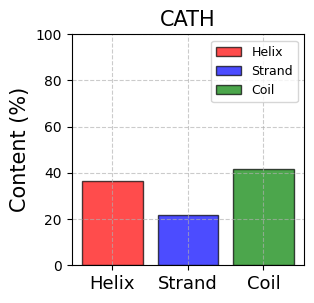

In [43]:
# Get mean values for the percentages
means = dssp_df[['helix_pct', 'strand_pct', 'coil_pct']].mean()

fig, ax = plt.subplots(figsize=(3, 3), dpi=100)
bars = ax.bar(means.index, means.values, color=['red', 'blue', 'green'], alpha=0.7, edgecolor='black', linewidth=1)

ax.set_title(f'CATH', fontsize=15)
ax.set_ylabel("Content (%)", fontsize=15)
ax.set_ylim(0, 100)  # Assuming percentages

ax.set_xticks(range(len(means.index)))
ax.set_xticklabels(["Helix", "Strand", "Coil"], fontsize=13)

ax.legend(bars, ["Helix", "Strand", "Coil"], fontsize=9)

ax.grid(True, linestyle='--', alpha=0.65)

plt.show()